# Importing libraries

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Reading csv file

In [263]:
columns = ["Age","Work-Class","Fnlwgt","Education", "Education-Num", "Marital-Status","Occupation", "Relationship","Race", "Sex","Capital-Gain","Capital-Loss","Hours-Per-Week","Native-Country","Salary"]

data = pd.read_csv('census-adult.data',names=columns, na_values = " ?")

# Replacing state gov, federal gov, local gov with Goverment
# Replacing Self-emp-not-inc, Self-emp-inc with Self -employed

In [264]:
data.replace(to_replace =[" State-gov", " Local-gov"," Federal-gov"], 
                            value ="Goverment",inplace = True)

data.replace([" Self-emp-not-inc"," Self-emp-inc"], " Self-employed", inplace = True)

# Data exploratory analysis

In [266]:
data.head().T

,0,1,2,3,4
Age,39,50,38,53,28
Work-Class,Goverment,Self-employed,Private,Private,Private
Fnlwgt,77516,83311,215646,234721,338409
Education,Bachelors,Bachelors,HS-grad,11th,Bachelors
Education-Num,13,13,9,7,13
Marital-Status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
Occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
Relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
Race,White,White,White,Black,Black
Sex,Male,Male,Male,Male,Female


# Checking data types of each columns and memory usage

In [267]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work-Class      30725 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  31978 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [268]:
#salary

# Checking null values 

In [269]:
data.isnull().sum()

Age                  0
Work-Class        1836
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Native-Country     583
Salary               0
dtype: int64

<AxesSubplot:>

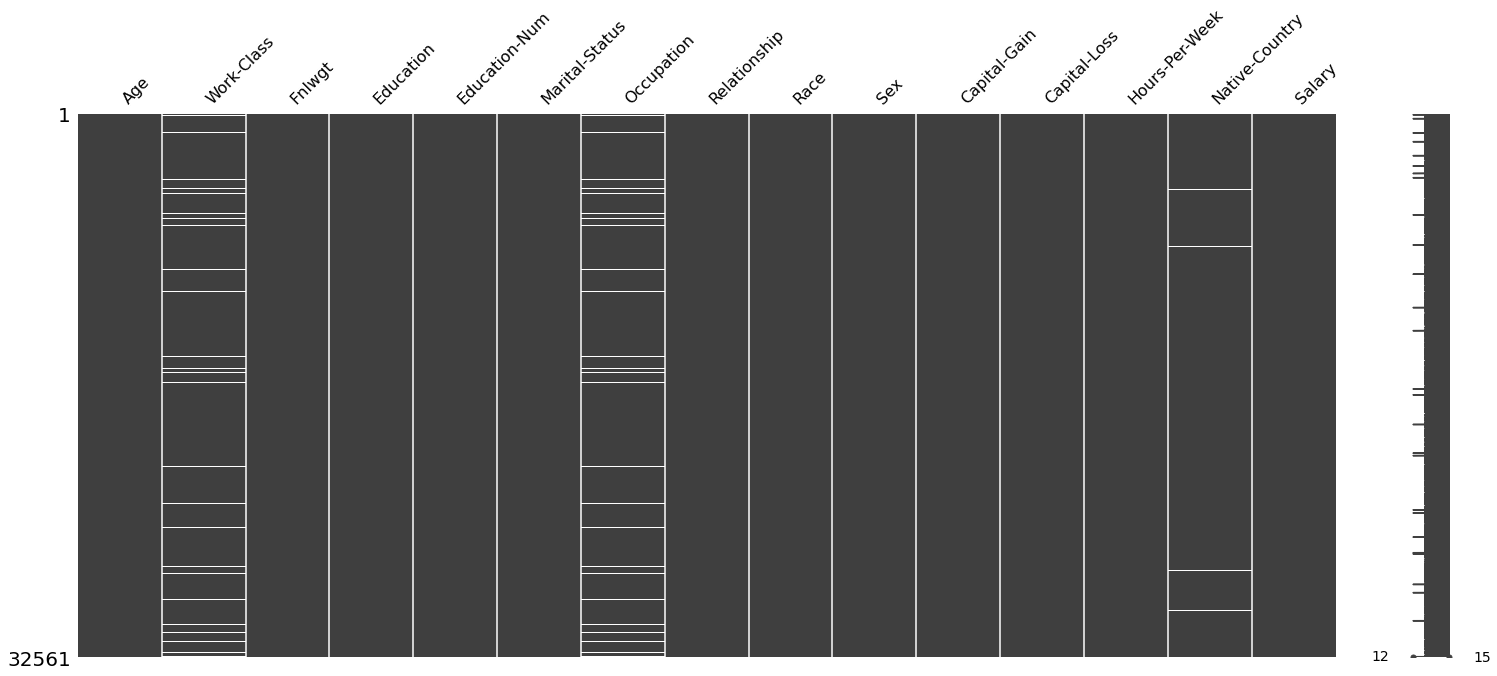

In [270]:
missingno.matrix(data)

In [271]:
missingValues = data[data.isnull().any(axis = 1)]

In [272]:
missingValues.shape  

(2399, 15)

2399 rows have missing values

# Saving csv file in parent folder

In [322]:
missingValues.to_csv("missingvalues.csv")

# Dropping Null values from the dataset

In [274]:
data.dropna(axis = 0, inplace = True)

In [275]:
data.head()

,Age,Work-Class,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,39,Goverment,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-employed,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [276]:
data.shape

(30162, 15)

# Feature engineering on column  Age

In [277]:
new_data = [data]
for dataset in new_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3
    
    
    #if you dont convert the dataset type into integer it will throw error of 'list' object has no attribute 'loc'

In [278]:
data.head()

,Age,Work-Class,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,1,Goverment,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,Self-employed,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,1,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [279]:
dataAge = data['Age']
dataAge = dataAge.replace(0,"<20")
dataAge.replace(1,"21-40",inplace = True)
dataAge.replace(2,"41-60",inplace = True)
dataAge.replace(3, ">60", inplace = True)

In [280]:
dataAge.unique()

array(['21-40', '41-60', '<20', '>60'], dtype=object)

# Creating sample data 

In [318]:
seed = 100
sample = data.sample(n=seed,random_state= 11261997)

In [321]:
sample.to_csv('randomSample.csv')

# Plotting values of sample data

Text(0, 0.5, 'Number of people')

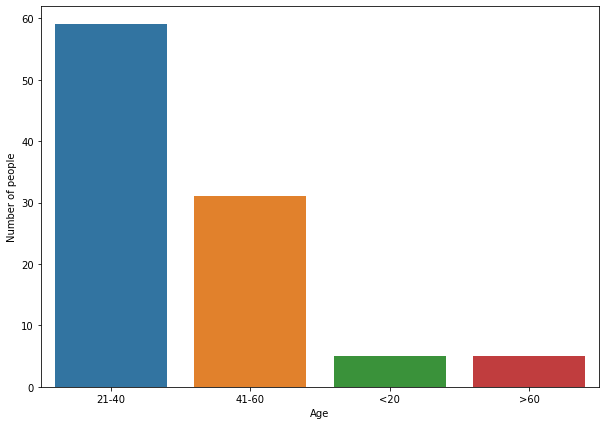

In [320]:
plt.figure(figsize = (10,7))
sns.countplot(x=sample['Age_str'],order = ['21-40','41-60','<20','>60'])
plt.xlabel('Age')
plt.ylabel('Number of people')

In [281]:
data['Age_str'] = dataAge

# Creating countplot of Age with whole data

Text(0, 0.5, 'Number of people')

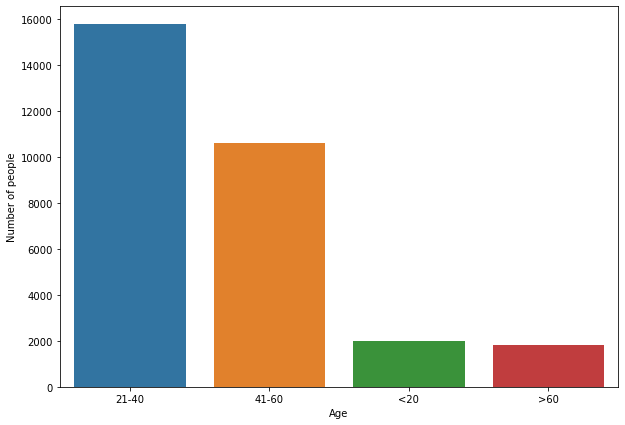

In [283]:
plt.figure(figsize = (10,7))
sns.countplot(x=data['Age_str'])
plt.xlabel('Age')
plt.ylabel('Number of people')

<AxesSubplot:xlabel='Age_str', ylabel='count'>

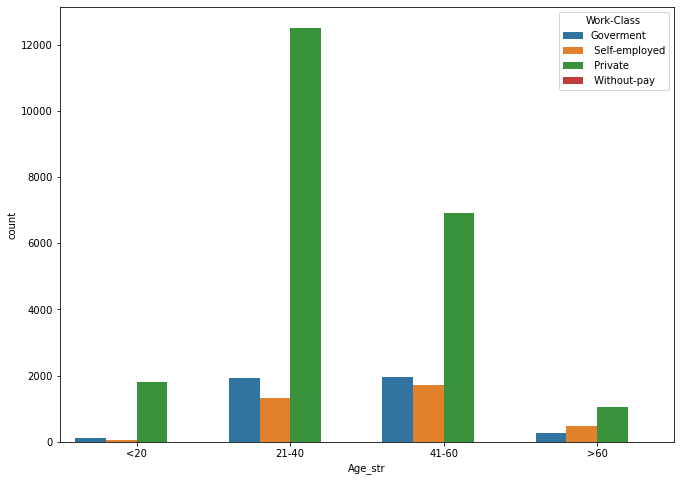

In [284]:
plt.figure(figsize = (11,8))
sns.countplot(x=data['Age_str'],hue = data["Work-Class"],order = ['<20','21-40','41-60','>60'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

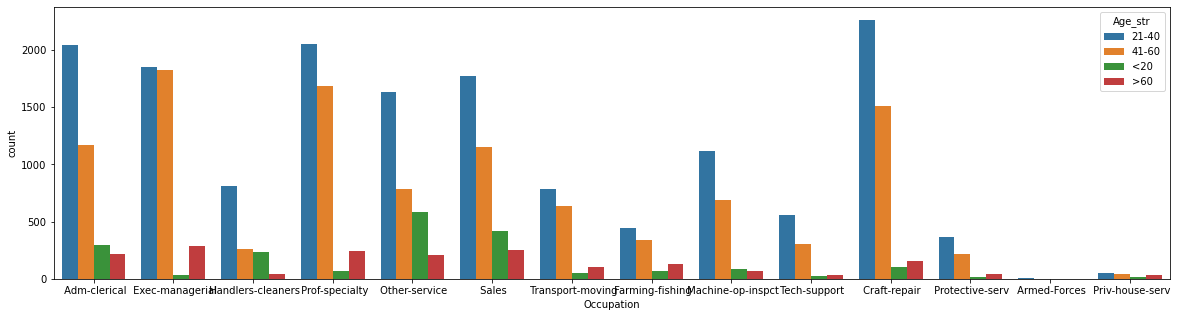

In [285]:
plt.figure(figsize= (20,5))
sns.countplot(x=data['Occupation'],hue = data["Age_str"])

# Creating pie chart for the above age groups against Profession

In [286]:
data[["Work-Class", "Age_str"]].value_counts()

Work-Class      Age_str
 Private        21-40      12509
                41-60       6913
Goverment       41-60       1961
                21-40       1939
 Private        <20         1812
 Self-employed  41-60       1720
                21-40       1311
 Private        >60         1052
 Self-employed  >60          476
Goverment       >60          271
                <20          118
 Self-employed  <20           66
 Without-pay    >60            7
                21-40          3
                41-60          2
                <20            2
dtype: int64

# For Age 20

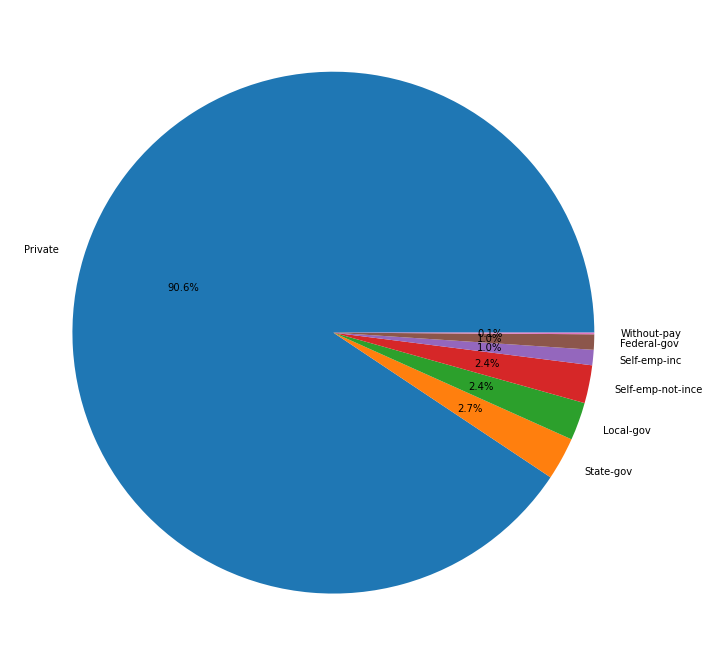

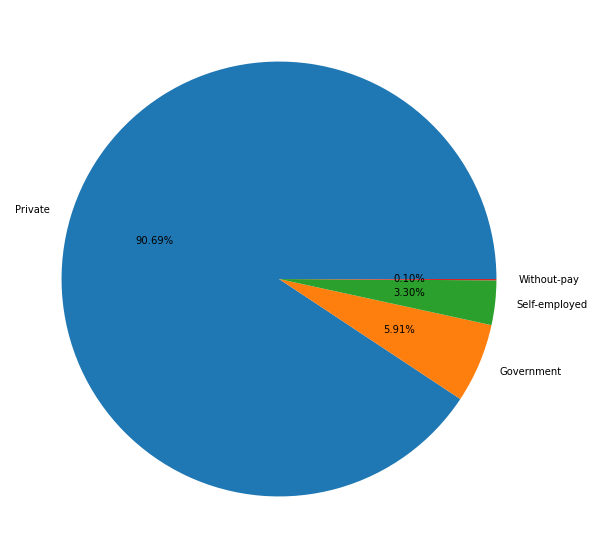

In [287]:
#age 20

fig = plt.figure(figsize =(12,12))
labels = ['Private','State-gov','Local-gov','Self-emp-not-ince', 'Self-emp-inc','Federal-gov',"Without-pay"]
pie_20 = [1812,53,47,47,19,19,2]

plt.pie(pie_20, labels= labels,autopct = "%0.1f%%")
plt.show()

#age 20

fig = plt.figure(figsize =(10, 10))
labels = ['Private','Government','Self-employed',"Without-pay"]
pie_20 = [1812,118,66,2]

plt.pie(pie_20, labels= labels,autopct = "%0.2f%%")
plt.show()

# For age 21-40

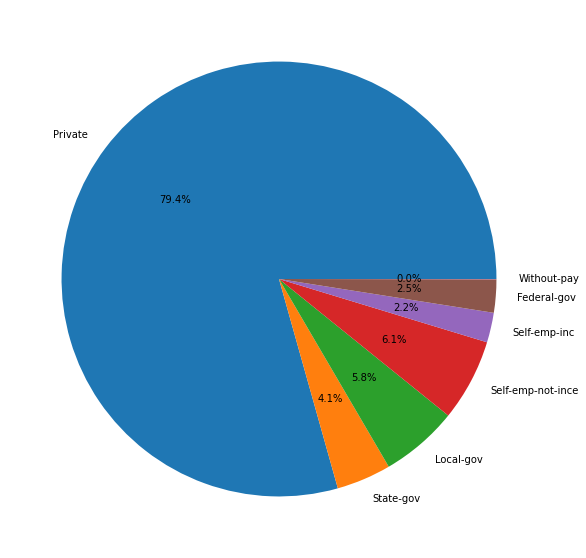

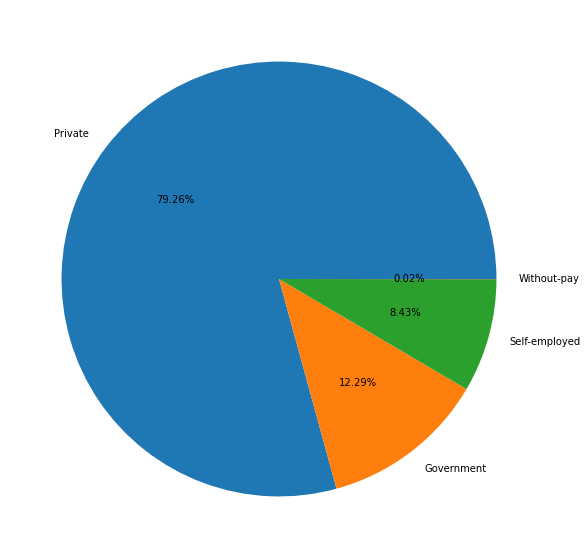

In [288]:
fig = plt.figure(figsize =(10, 10))
labels = ['Private','State-gov','Local-gov','Self-emp-not-ince', 'Self-emp-inc','Federal-gov',"Without-pay"]
pie_20 = [12509,640,910,962,349,389,3]
plt.pie(pie_20, labels= labels, autopct = "%0.1f%%")
plt.show()

fig = plt.figure(figsize =(10, 10))
labels = ['Private','Government','Self-employed',"Without-pay"]
pie_20 = [12509,1939,1331,3]
plt.pie(pie_20, labels= labels,autopct = "%0.2f%%")
plt.show()

# For age 40-60

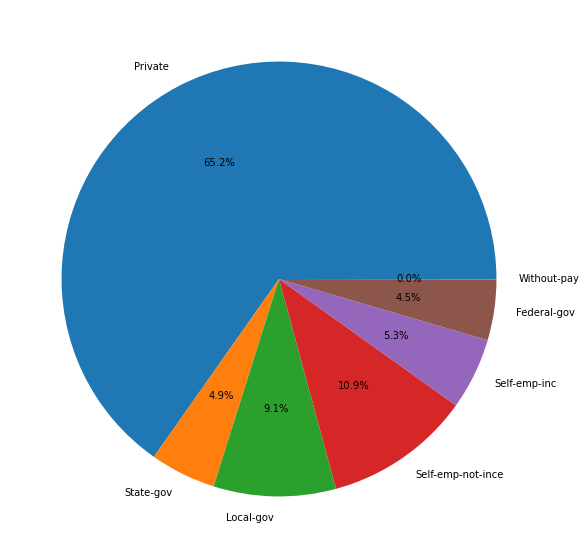

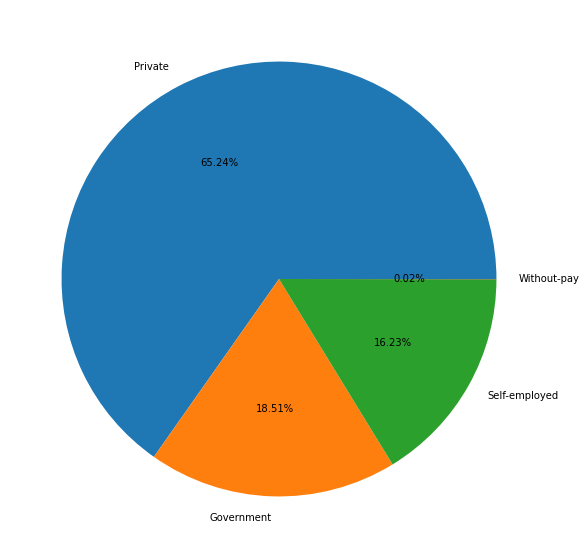

In [289]:
fig = plt.figure(figsize =(10, 10))
labels = ['Private','State-gov','Local-gov','Self-emp-not-ince', 'Self-emp-inc','Federal-gov',"Without-pay"]
pie_20 = [6913,519,963,1155,565,479,2]

plt.pie(pie_20, labels= labels, autopct = "%0.1f%%")
plt.show()

fig = plt.figure(figsize =(10, 10))
labels = ['Private','Government','Self-employed',"Without-pay"]
pie_20 = [6913,1961,1720,2]

plt.pie(pie_20, labels= labels,autopct = "%0.2f%%")
plt.show()

# For age above 60 

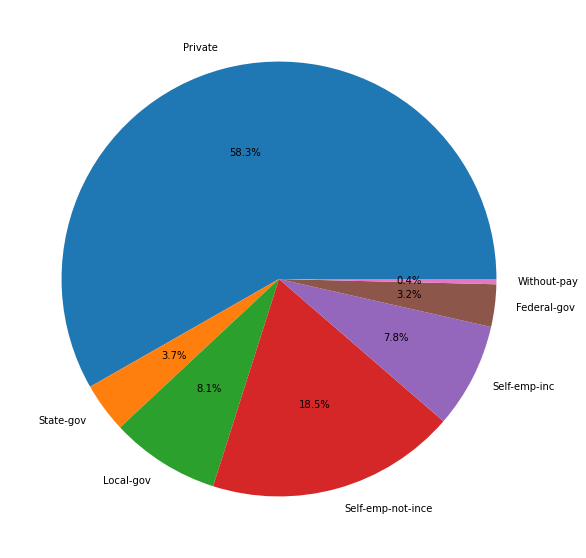

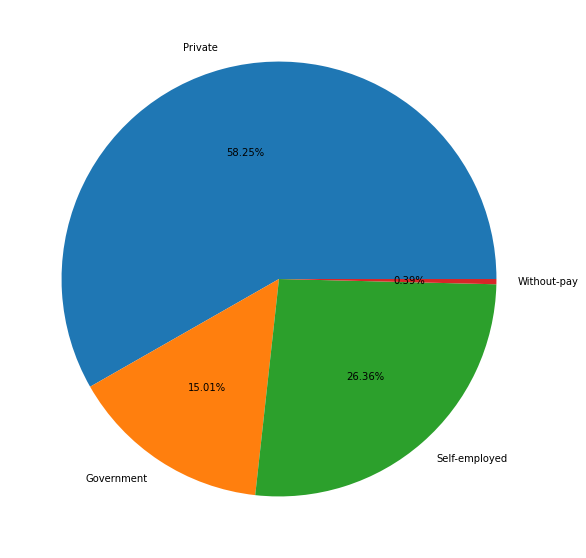

In [290]:
fig = plt.figure(figsize =(10, 10))
labels = ['Private','State-gov','Local-gov','Self-emp-not-ince', 'Self-emp-inc','Federal-gov',"Without-pay"]
pie_20 = [1052,67,147,335,141,57,7]
plt.pie(pie_20, labels= labels, autopct = "%0.1f%%")
plt.show()

fig = plt.figure(figsize =(10, 10))
labels = ['Private','Government','Self-employed',"Without-pay"]
pie_20 = [1052,271,476,7]
plt.pie(pie_20, labels= labels,autopct = "%0.2f%%")
plt.show()

In [291]:
data[['Sex','Education']].value_counts()

Sex      Education    
 Male     HS-grad         6734
          Some-college    4171
          Bachelors       3522
 Female   HS-grad         3106
          Some-college    2507
          Bachelors       1522
 Male     Masters         1118
          Assoc-voc        852
          11th             677
          Assoc-acdm       613
          10th             570
 Female   Masters          509
 Male     Prof-school      455
 Female   Assoc-voc        455
 Male     7th-8th          425
 Female   Assoc-acdm       395
          11th             371
 Male     9th              336
          Doctorate        294
          12th             255
 Female   10th             250
 Male     5th-6th          219
 Female   7th-8th          132
          12th             122
          9th              119
 Male     1st-4th          108
 Female   Prof-school       87
          Doctorate         81
          5th-6th           69
          1st-4th           43
 Male     Preschool         31
 Female   Presch

# Further analysis

<AxesSubplot:>

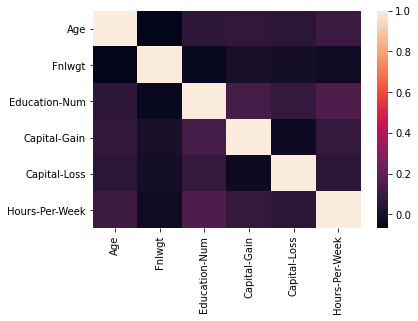

In [292]:
sns.heatmap(data.corr())

In [293]:
data.corr().sum().sort_values()

Fnlwgt            0.854971
Capital-Loss      1.143972
Age               1.229144
Capital-Gain      1.245795
Hours-Per-Week    1.368681
Education-Num     1.375722
dtype: float64

In [294]:
data["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:xlabel='Salary,Age_str'>

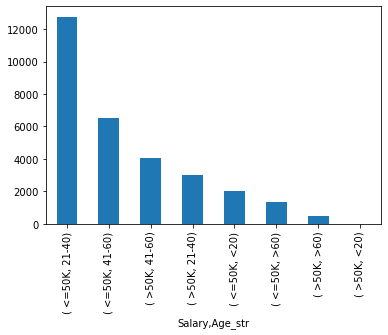

In [295]:
data[["Salary", "Age_str"]].value_counts().plot(kind = "bar")

In [296]:
data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [297]:
#data.replace(" <=50K", "0", inplace = True)
#data.replace(" >50K", "1", inplace = True)

#We have to convert dtype object into integer to plot Facetgrid.

/Users/kelsey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kelsey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


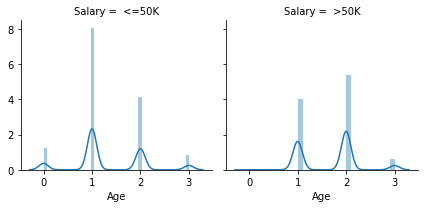

In [298]:
g = sns.FacetGrid(data, col = "Salary")
g.map(sns.distplot,"Age")

In [304]:
data[["Sex", "Education"]].value_counts()

Sex      Education    
 Male     HS-grad         6734
          Some-college    4171
          Bachelors       3522
 Female   HS-grad         3106
          Some-college    2507
          Bachelors       1522
 Male     Masters         1118
          Assoc-voc        852
          11th             677
          Assoc-acdm       613
          10th             570
 Female   Masters          509
 Male     Prof-school      455
 Female   Assoc-voc        455
 Male     7th-8th          425
 Female   Assoc-acdm       395
          11th             371
 Male     9th              336
          Doctorate        294
          12th             255
 Female   10th             250
 Male     5th-6th          219
 Female   7th-8th          132
          12th             122
          9th              119
 Male     1st-4th          108
 Female   Prof-school       87
          Doctorate         81
          5th-6th           69
          1st-4th           43
 Male     Preschool         31
 Female   Presch

In [316]:
data[["Work-Class","Age_str"]].value_counts()

Work-Class      Age_str
 Private        21-40      12509
                41-60       6913
Goverment       41-60       1961
                21-40       1939
 Private        <20         1812
 Self-employed  41-60       1720
                21-40       1311
 Private        >60         1052
 Self-employed  >60          476
Goverment       >60          271
                <20          118
 Self-employed  <20           66
 Without-pay    >60            7
                21-40          3
                41-60          2
                <20            2
dtype: int64

<AxesSubplot:xlabel='Work-Class,Age_str'>

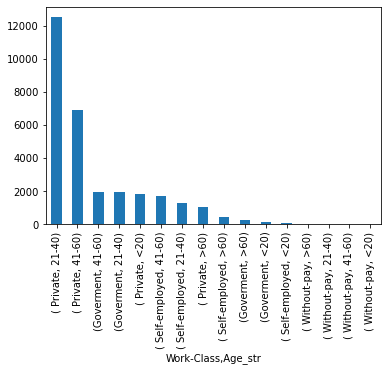

In [317]:
data[["Work-Class","Age_str"]].value_counts().plot(kind = 'bar')

# Thank you